# Aula05.Ex01 - Introdução Transformação Geométrica (Exemplo 2D)

Na Aula05 estudamos os conceitos de transformação geométrica, especialmente as matrizes de transformação geométrica: translação, escala e rotação.

Neste exemplo prático, nós exercitaremos todos os conceitos da Aula05 considerando um espaço de coordenadas 2D e uma matriz pixels.

Nossos exemplos envolvem apenas desenhos simples gerados por meio de retas.

Para desenhar um segmento de reta, vamos usar um algoritmo estudado na Aula03 (Bresenham). Lembre-se que a vantagem desse algoritmo é evitar pontos flutantes durante a "rasterização".

### Importanto bibliotecas

Vamos utilizar uma biblioteca (Pillow) para geração de imagens  e manipulação de matrizes de pixel das imagens. Isso nos permitirá visualizar em tempo real as transformações geométricas realizadas.

Caso não tenha a biblioteca Pillow instalada:
`pip install Pillow`


In [15]:
from PIL import Image
from IPython.display import display
import math

### Criando e exibindo uma imagem vazia (pixels R=0, G=0, B=0)

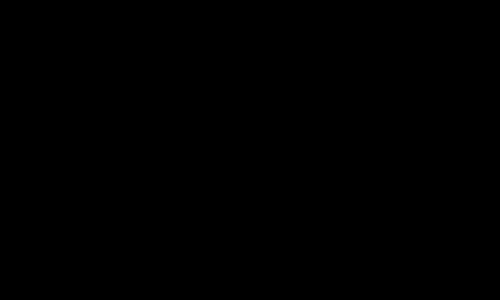

In [33]:
largura = 500
altura = 300

imagem = Image.new('RGB', (largura, altura))

display(imagem)

### Algoritmo de Bresenham

O algoritmo de Bresenham está definido abaixo. Confira a Aula03 do curso para relembrá-lo!

Nessa função, nosso algoritmo de Bresenham possui quatro parâmetros:
* v1 = coordenadas do ponto 1 (em formato matricial)
* v2 = coordenadas do ponto 2 (em formato matricial)
* imagem = objeto de imagem
* cor (opcional) = cor da linha pode ser branca ou vermelha

A saída do algorito é um segmento de reta entre v1 e v2.

In [34]:
def bresenham_line(v1, v2, imagem, cor='white'):
    
    # vertices recebidas no formato matricial
    x1 = v1[0][0]
    y1 = v1[1][0]
    
    x2 = v2[0][0]
    y2 = v2[1][0]
    
    cor_linha = (255,255,255) #white
    if cor == 'red':
        cor_linha = (255,0,0)

    matriz_pixels = imagem.load()
    
    # calculando diferenca em cada eixo
    dx = x2 - x1
    dy = y2 - y1
 
    # verificar se a linha é íngreme (steep)
    steep = False
    if abs(dy) > abs(dx): steep = True

 
    # se for íngreme, rotacionar a linha
    if steep:
        x1_temp = x1
        x1 = y1
        y1 = x1_temp
        
        x2_temp = x2
        x2 = y2
        y2 = x2_temp

 
    # Verificar se é necessario trocar as coordenadas
    # util para plotar da esquerda para direita
    swapped = False
    if x1 > x2:
        x1_temp = x1
        x1 = x2
        x2 = x1_temp
        
        y1_temp = y1
        y1 = y2
        y2 = y1_temp
        
        swapped = True
 
    # recalcular as diferencas no eixo
    dx = x2 - x1
    dy = y2 - y1
 
    # inicializando erro
    error = int(dx / 2.0)
    
    # inicilizando o incremento em y
    y_inc = -1
    if y1 < y2: y_inc = 1
 
    # inicializando y 
    y = y1
    
    # lista de coordenadas
    coordenadas = []
    
    # gerando coordenadas da linha
    for x in range(x1, x2 + 1): # incrementando x 
        coord = (x, y)
        if steep: # caso seja íngreme
            coord = (y, x)

        # adiciona a coordenada
        coordenadas.append(coord)
        
        # atualiza o erro
        error -= abs(dy)
        
        # incrementa y se erro for negativo
        if error < 0:
            y += y_inc
            error += dx
 
    # se as coordenadas foram trocadas, inverter a lista de coordenadas
    if swapped:
        coordenadas.reverse()
        
    for coord in coordenadas:
        x = coord[0]
        y = coord[1]
        if x < imagem.size[0] and y < imagem.size[1] and x >= 0 and y >= 0:
            matriz_pixels[x,y] = cor_linha
        

###### Desenhando um segmento de reta

Considere os vértices v1=(50,60) e v2=(200,300).

A chamada a seguir desenha um segmento partindo do vértice v1 e até o vértice v2.

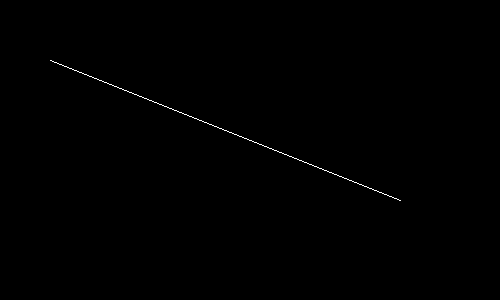

In [35]:
imagem = Image.new('RGB', (largura, altura))

v1 = [ 
        [50],
        [60]
     ]
v2 = [ 
        [400],
        [200]
     ]

bresenham_line(v1, v2, imagem)

display(imagem)

### Desenhando um Triângulo

Nosso triângulo possui os seguintes vértices:

* v1=(150,50)
* v2=(250,50)
* v3=(150,150)

Vamos desenhá-lo a seguir.

Atenção: nesse caso, o ponto (0,0) é está no ponto esquerdo superior da imagem.

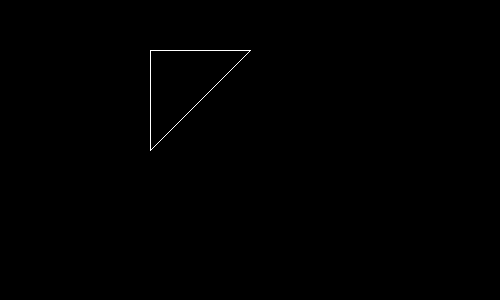

In [37]:
imagem = Image.new('RGB', (largura, altura))

v1 = [ [150], [50] ]
v2 = [ [250], [50] ]
v3 = [ [150], [150] ]

# de v1 para v2

bresenham_line(v1, v2, imagem)

# de v1 para v3
bresenham_line(v1, v3, imagem)

# de v3 para v2
bresenham_line(v3, v2, imagem)

display(imagem)

### Multiplicação de matrizes

Vimos na Aula05 que transformação geométrica em coordenadas homogêneas tem a grande vantagem de ser realizada por meio de simples multiplicação de matrizes.

Abaixo, vamos implementar uma função para multiplicar duas matrizes que será usada durante as nossas transformações geométricas.

In [20]:
def multiplica_matrizes(M1, M2):
    
    # recuperando dimensoes de M1
    m1_linhas = len(M1)
    m1_colunas = len(M1[0])
    
    # recuperando dimensoes de M2
    m2_linhas = len(M2)
    m2_colunas = len(M2[0])
    
    
    
    if m1_colunas != m2_linhas:
        print(m1_linhas,m1_colunas,m2_linhas,m2_colunas)
        print('Nao posso multiplicar. Dimensoes incorretas.')
        return -1

    # criando espaco para a M3
    M3 = [[0 for row in range(m2_colunas)] for col in range(m1_linhas)]
    
    for i in range(m1_linhas):
        for j in range(m2_colunas):
            for k in range(m1_colunas):
                M3[i][j] += M1[i][k] * M2[k][j]
                
    for i in range(m1_linhas):
        for j in range(m2_colunas):
            M3[i][j] = int(M3[i][j])
                
    return M3

### Transformação Geométrica: Translação

Agora que nós já sabemos desenhar nosso triângulo a partir de um conjunto de vértices, podemos experimentar as matrizes de transformação geométricas.

Vimos na Aula05 que todo vértice, na prática, será modelado por meio de quatro dimensões: x, y, z e w.

Nesses exemplos, estudaremos apenas o caso 2D. Por isso, vamos manter constantes os valores z=0 e w=1, e modificarmos apenas x e y.

Abaixo está definida a operação de translação. Observe a matriz de translação no código e verifique o conteúdo do slides da Aula05.

In [7]:
def translacao(vertice, t_x, t_y):
    
    # define a matriz de translacao
    matriz_translacao = [
                            [1, 0, t_x],
                            [0, 1, t_y],
                            [0, 0, 1  ]
                        ]
    
    # inicializa novo vertice
    vertice_t = multiplica_matrizes(matriz_translacao, vertice)
    
    # retorna novo vertice
    return vertice_t

### Exemplo de Translação

Considerando o exemplo de triângulo anterior, vamos testar a translação. Basicamente, vamos fazer nosso triângulo transladar +50 no eixo x e +80 no eixo y.

Vamos desenhar o triângulo original em branco e o triângulo transladado em vermelho.

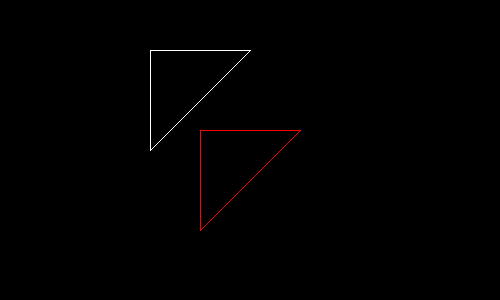

In [40]:
imagem = Image.new('RGB', (largura, altura))

# vertices do triângulo (lembre-se que mantemos h=1), no formato matricial
v1=[[150],[50],[1]]
v2=[[250],[50],[1]]
v3=[[150],[150],[1]]

# vamos desenhar o triangulo original na cor branca
bresenham_line(v1, v2, imagem)
bresenham_line(v1, v3, imagem)
bresenham_line(v2, v3, imagem)

# agora, vamos calcular os vertices transladados com +50 em x e +80 em y (e zero em z)
v1_t = translacao(v1, +50, +80)
v2_t = translacao(v2, +50, +80)
v3_t = translacao(v3, +50, +80)

# vamos desenhar o triangulo transladado na cor vermelha
bresenham_line(v1_t, v2_t, imagem, cor='red')
bresenham_line(v1_t, v3_t, imagem, cor='red')
bresenham_line(v2_t, v3_t, imagem, cor='red')

display(imagem)

### Transformação Geométrica: Escala

Abaixo está o programa que usa uma matriz de transformação para alterar a escala, com base nos vértices de entrada.

Veja o conteúdo da Aula05 para mais detalhes sobre a origem desta matriz.

In [9]:
def escala(vertice, e_x, e_y ):
    
    # define a matriz de translacao
    matriz_escala = [
                            [e_x, 0  , 0  ],
                            [0  , e_y, 0  ],
                            [0  , 0  , 1  ]
                        ]
    
    # inicializa novo vertice
    vertice_e = multiplica_matrizes(matriz_escala, vertice)
    
    # retorna novo vertice
    return vertice_e

### Exemplo de transformação geométrica para escala

Vamos usar nosso triângulo de exemplo e aumentá-lo 50% o seu tamanho. Isso significa, que o fator de escala será de 1.5. Para reduzir em 25% do seu tamanho, use o fator de escala 0.75. Para não alterar a escala, o fator é 1.0.

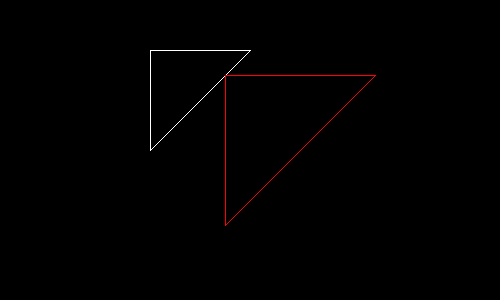

In [43]:
imagem = Image.new('RGB', (largura, altura))

# vertices do triângulo (lembre-se que mantemos h=1), no formato matricial
v1=[[150],[50],[1]]
v2=[[250],[50],[1]]
v3=[[150],[150],[1]]

# vamos desenhar o triangulo original na cor branca
bresenham_line(v1, v2, imagem)
bresenham_line(v1, v3, imagem)
bresenham_line(v2, v3, imagem)

# agora, vamos calcular os vertices reescalados em 50%
v1_e = escala(v1, 1.5, 1.5)
v2_e = escala(v2, 1.5, 1.5)
v3_e = escala(v3, 1.5, 1.5)

# vamos desenhar o triangulo escalado na cor vermelha
bresenham_line(v1_e, v2_e, imagem, cor='red')
bresenham_line(v1_e, v3_e, imagem, cor='red')
bresenham_line(v2_e, v3_e, imagem, cor='red')

display(imagem)

### Analisando a transformação geométrica de escala...

O resultado anterior deixa claro que aumentamos a escala do nosso objeto.

No entanto, observe que também foi realizado uma translação!

Para controlar esse efeito, é necessário definir a escala a partir de um ponto de referência. Em geral, esse ponto de referência pode ser qualquer ponto. No entanto, é comum que seja algum ponto do objeto, por exemplo, um dos vértices.

Escolhido o ponto de referência, nós então fazemos o seguinte:

1. Translação do objeto, com base no ponto de referência, para a origem (0,0) do sistema de coordenadas.

2. Aplicar a transformação de escala no objeto.

3. Translação do objeto da origem (0,0) para sua posição original, conforme o ponto de referência adotado.

Vamos fazer essa operação escolhendo v1=(150,50) como ponto de referência.

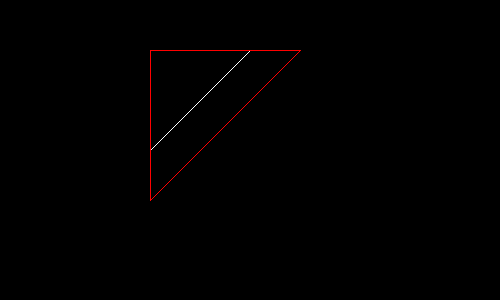

In [44]:
imagem = Image.new('RGB', (largura, altura))

# vertices do triângulo (lembre-se que mantemos h=1), no formato matricial
v1=[[150],[50],[1]]
v2=[[250],[50],[1]]
v3=[[150],[150],[1]]

# vamos desenhar o triangulo original na cor branca
bresenham_line(v1, v2, imagem)
bresenham_line(v1, v3, imagem)
bresenham_line(v2, v3, imagem)

# vamos transladar para a origem, usando v1 de referencia
v1_t = translacao(v1, -150, -50)
v2_t = translacao(v2, -150, -50)
v3_t = translacao(v3, -150, -50)

# vamos calcular os vertices reescalados em 50%
v1_e = escala(v1_t, 1.5, 1.5)
v2_e = escala(v2_t, 1.5, 1.5)
v3_e = escala(v3_t, 1.5, 1.5)

# vamos transladar de volta par posicao original
v1_t = translacao(v1_e, +150, +50)
v2_t = translacao(v2_e, +150, +50)
v3_t = translacao(v3_e, +150, +50)

# vamos desenhar o triangulo escalado na cor vermelha
bresenham_line(v1_t, v2_t, imagem, cor='red')
bresenham_line(v1_t, v3_t, imagem, cor='red')
bresenham_line(v2_t, v3_t, imagem, cor='red')

display(imagem)

Observe que a escala foi aplicada a partir do vértice de referência v1=(150,50)

### Transformação Geométrica: Rotação

Abaixo está o programa que usa uma matriz de transformação para rotacionar, com base nos vértices de entrada.

Veja o conteúdo da Aula05 para mais detalhes sobre a origem desta matriz.

In [12]:
def rotacao(vertice, angulo):

    rad = math.radians(angulo) 
    c = math.cos(rad)
    s = math.sin(rad)
    
    # define a matriz de rotacao 
    matriz_rotacao = [
                        [c  , -s , 0],
                        [s  , c  , 0],
                        [0  , 0  , 1]
                     ]
    

    
    # inicializa novo vertice
    vertice_r = multiplica_matrizes(matriz_rotacao, vertice)
    
    return vertice_r

### Exemplo de transformação geométrica de rotação

Vamos usar nosso triângulo de exemplo e rotacioná-lo em 45 graus.

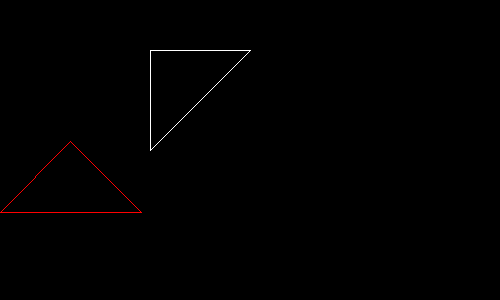

In [48]:
imagem = Image.new('RGB', (largura, altura))

# vertices do triângulo (lembre-se que mantemos h=1), no formato matricial
v1=[[150],[50],[1]]
v2=[[250],[50],[1]]
v3=[[150],[150],[1]]

# vamos desenhar o triangulo original na cor branca
bresenham_line(v1, v2, imagem)
bresenham_line(v1, v3, imagem)
bresenham_line(v2, v3, imagem)

# agora, vamos rotacionar em 45 graus
v1_r = rotacao(v1, 45)
v2_r = rotacao(v2, 45)
v3_r = rotacao(v3, 45)

# vamos desenhar o triangulo rotacionado na cor vermelha
bresenham_line(v1_r, v2_r, imagem, cor='red')
bresenham_line(v1_r, v3_r, imagem, cor='red')
bresenham_line(v2_r, v3_r, imagem, cor='red')

display(imagem)

### Analisando a transformação geométrica de rotação...

De fato o objeto foi rotacionado. No entanto, assim como ocorreu com a transformação de escala, observe que também foi realizado uma translação!

Para controlar esse efeito, é necessário definir a rotação a partir de um ponto de referência. Em geral, esse ponto de referência pode ser qualquer ponto. No entanto, é comum que seja algum ponto do objeto, por exemplo, um dos vértices.

Escolhido o ponto de referência, nós então fazemos o seguinte:

1. Translação do objeto, com base no ponto de referência, para a origem (0,0) do sistema de coordenadas.

2. Aplicar a transformação de rotação no objeto.

3. Translação do objeto da origem (0,0) para sua posição original, conforme o ponto de referência adotado.

Vamos fazer essa operação escolhendo v1=(150,50) como ponto de referência.

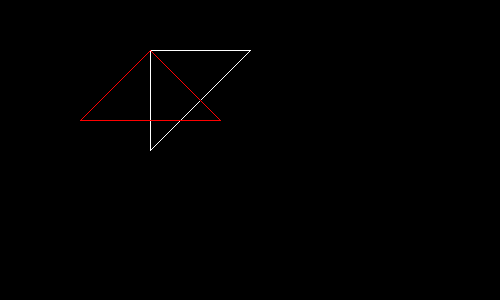

In [51]:
imagem = Image.new('RGB', (largura, altura))

# vertices do triângulo (lembre-se que mantemos h=1), no formato matricial
v1=[[150],[50],[1]]
v2=[[250],[50],[1]]
v3=[[150],[150],[1]]

# vamos desenhar o triangulo original na cor branca
bresenham_line(v1, v2, imagem)
bresenham_line(v1, v3, imagem)
bresenham_line(v2, v3, imagem)

# vamos transladar para a origem, usando v1 de referencia
v1_t = translacao(v1, -150, -50)
v2_t = translacao(v2, -150, -50)
v3_t = translacao(v3, -150, -50)

# agora, vamos rotacionar em 45 graus
v1_r = rotacao(v1_t, 45)
v2_r = rotacao(v2_t, 45)
v3_r = rotacao(v3_t, 45)

# vamos transladar de volta par posicao original
v1_t = translacao(v1_r, +150, +50)
v2_t = translacao(v2_r, +150, +50)
v3_t = translacao(v3_r, +150, +50)

# vamos desenhar o triangulo escalado na cor vermelha
bresenham_line(v1_t, v2_t, imagem, cor='red')
bresenham_line(v1_t, v3_t, imagem, cor='red')
bresenham_line(v2_t, v3_t, imagem, cor='red')

display(imagem)

Observe acima que o objeto foi rotacionado em relação ao vértice de referência v1=(150,50)

# Exercício

Em nenhum momento neste exercício nós fizemos uso de transformações compostas, ou seja, computar uma matriz final de transformação a partir da multiplicação de outras matrizes de transformação. Na prática, fizemos o seguinte:

1. V_t = Matriz_Translacao*V (translação de vértices para a origem)
2. V_r = Matriz_Rotacao*V_t (rotação de vértices)
3. V_f = Matriz_Translação*V_r (translação de vértices para a posição orignal)

Modifique o código para calcular uma matriz de transformação composta. Em seguida, use apenas esta matriz para transformação do objeto

1. M_final = Matriz_Translacao * Matriz_Rotacao * Matriz_Translação
2. V_f = M_final * V
